In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns; sns.set(color_codes=True)  # visualization tool
from sklearn.svm import SVC #support vector machine
import matplotlib.pyplot as plt # visualization tool
import seaborn as sns

In [2]:
#warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading of data
df=pd.read_csv("heart.csv")

In [4]:
print(df.head)
print(df.columns)

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

### Plotting each attribute

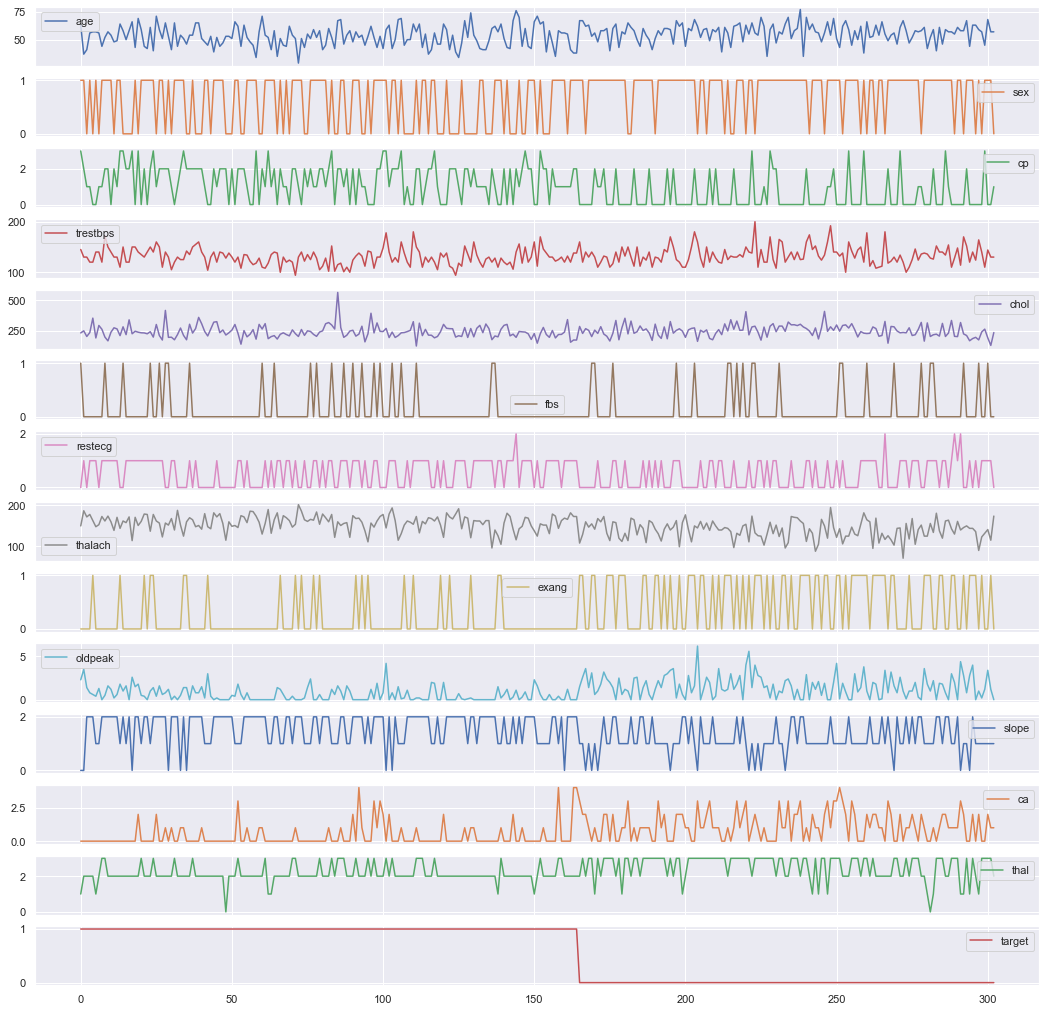

In [5]:
df.plot(subplots=True,figsize=(18,18))
plt.show()

### Heatmap

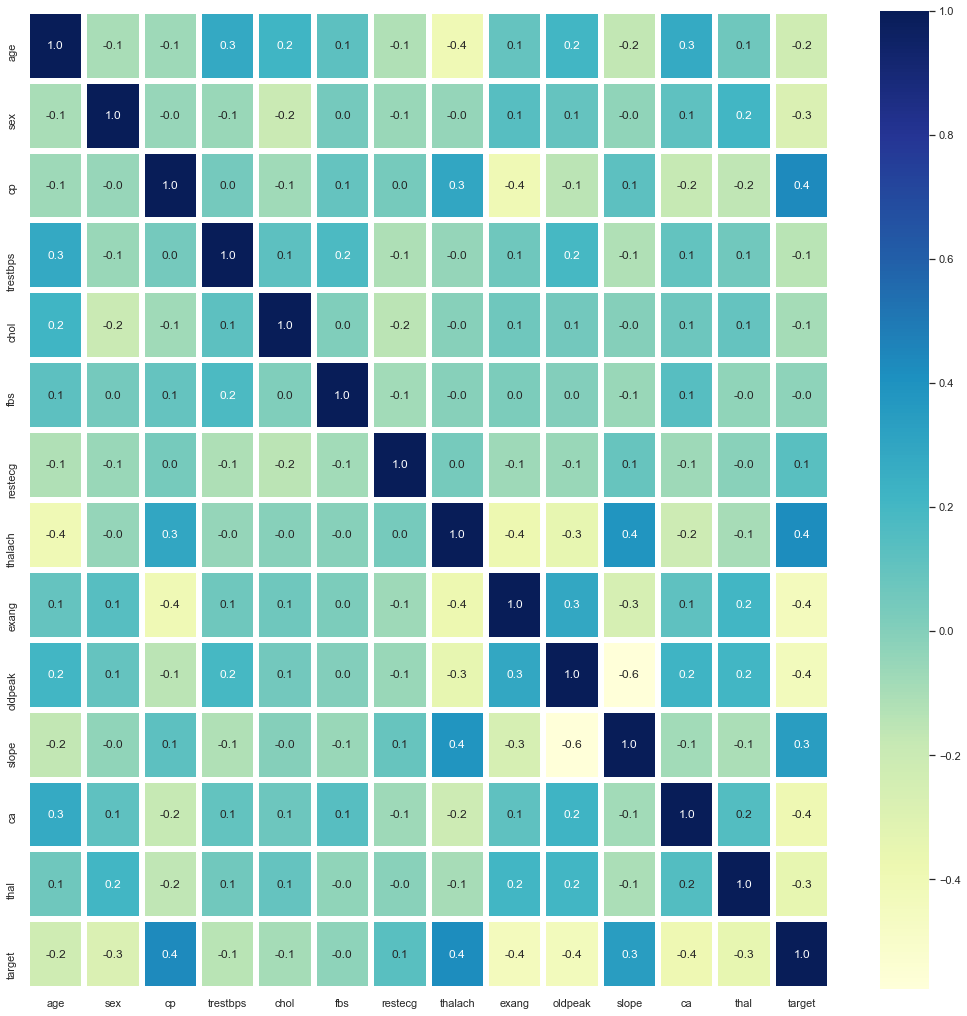

In [6]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,linewidth=5,fmt='.1f',ax=ax,cmap = 'YlGnBu')
plt.show()

### Histogram

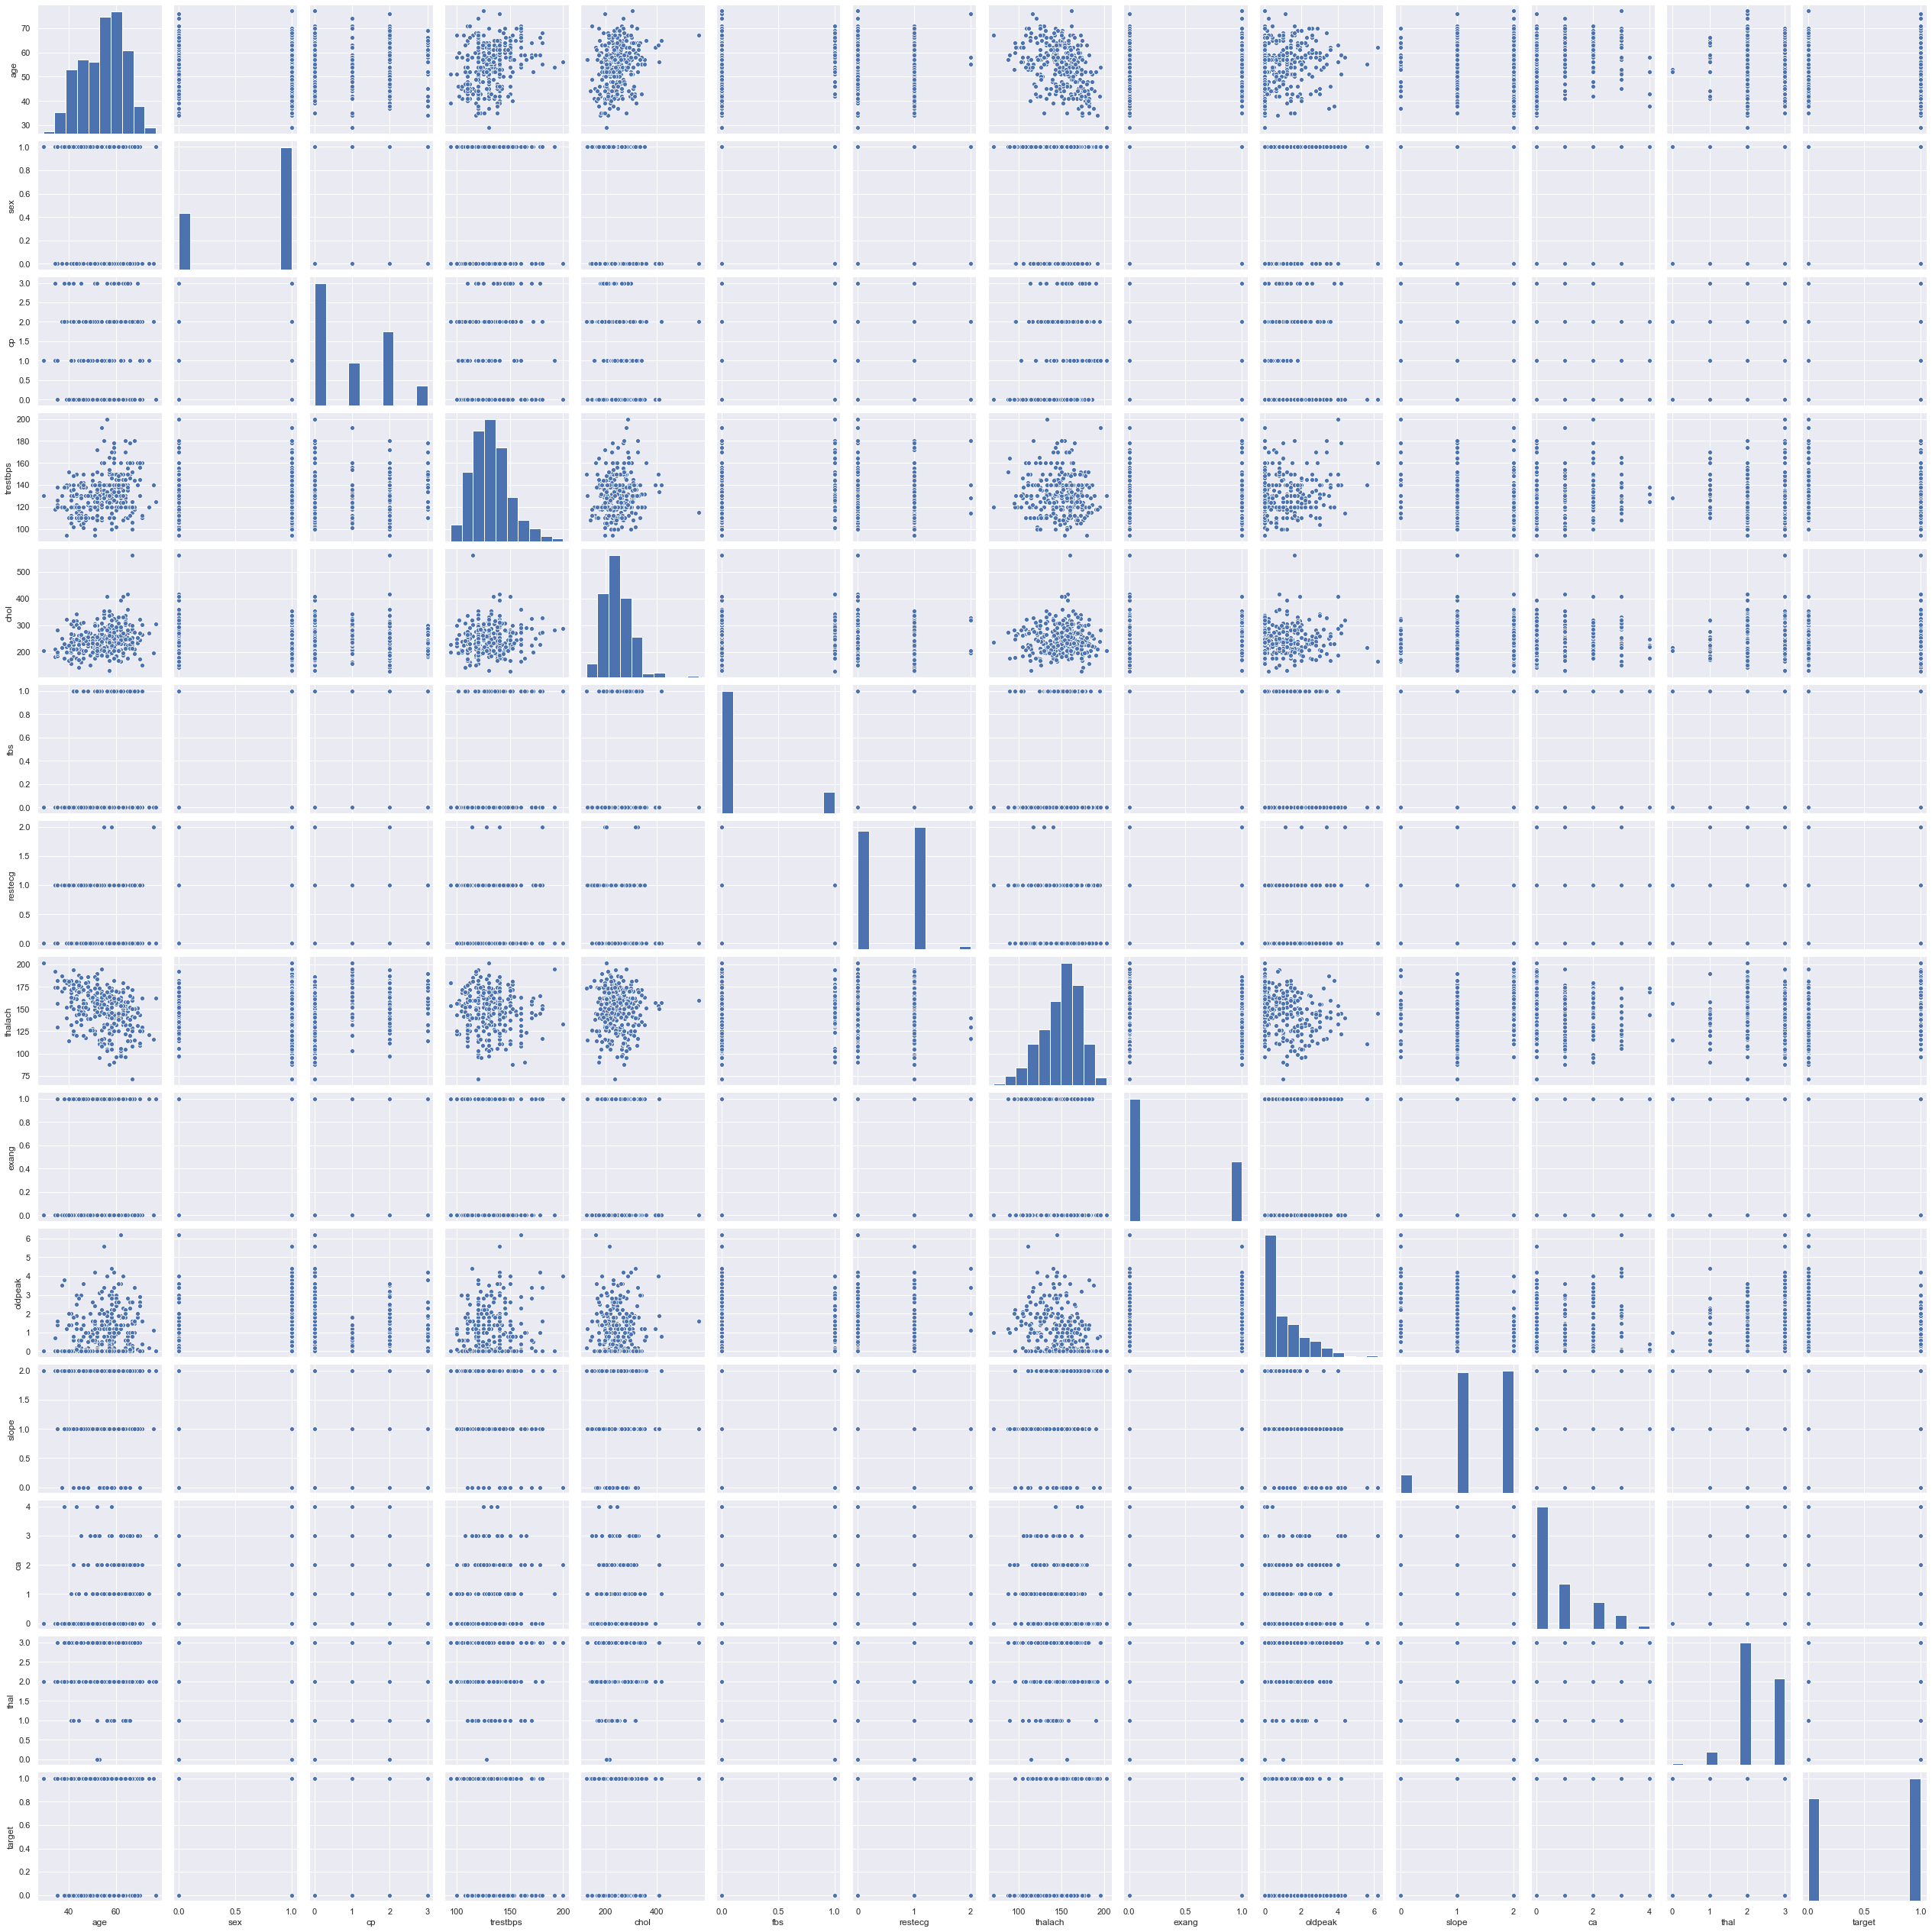

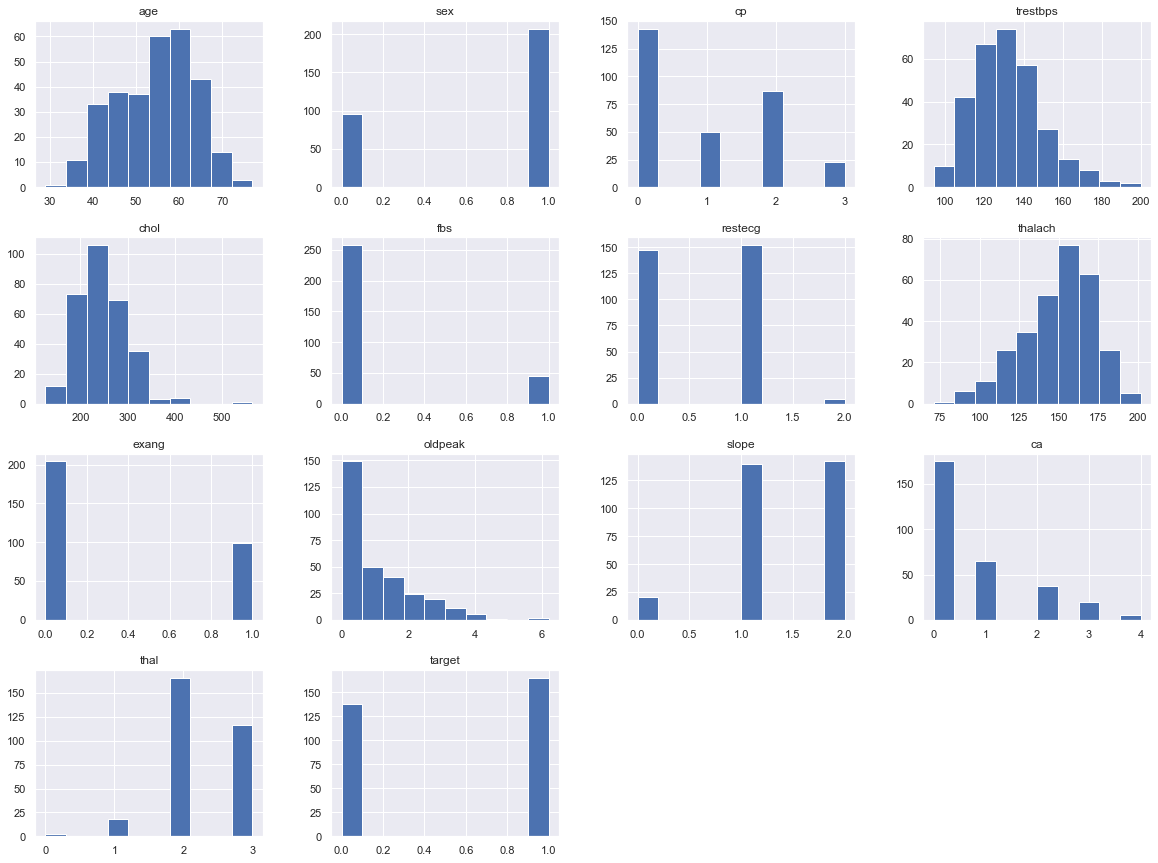

In [7]:
sns.pairplot(df)
fig=plt.figure(figsize=(20,15))
ax=fig.gca()
df.hist(ax=ax)
plt.show()

### Box plot

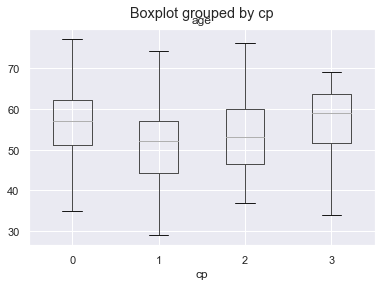

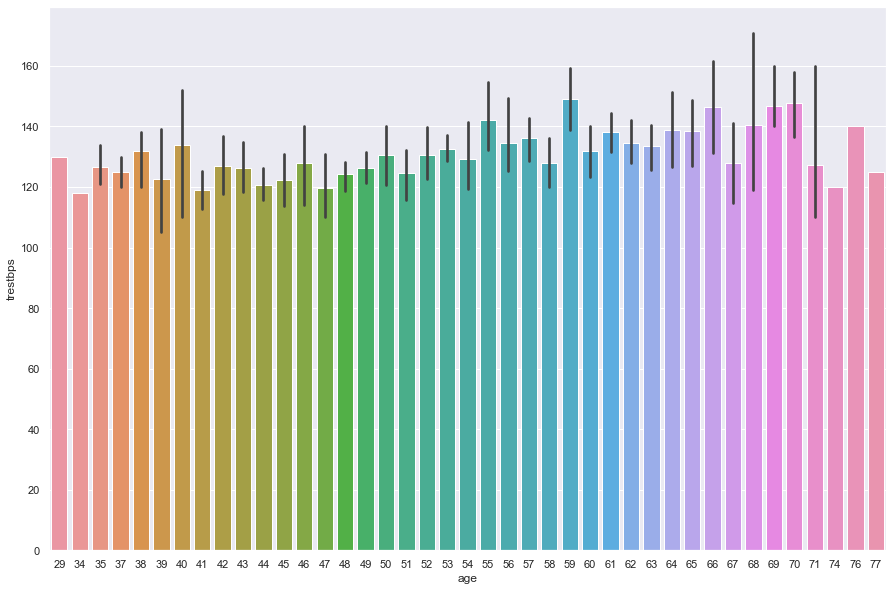

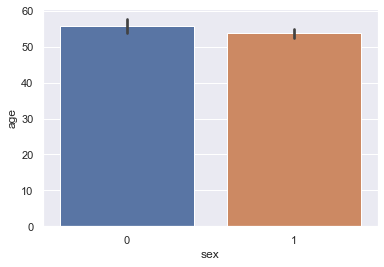

In [8]:
df.boxplot(column='age', by='cp')
plt.show()
plt.figure(figsize=(15,10))
sns.barplot(x='age',y='trestbps',data=df)
plt.show()
sns.barplot(x='sex',y='age',data=df)
plt.show()

## Support Vector Classifier(SVC)

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [10]:
#splitting of dataset into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print(cm_train)
print(cm_test)

[[ 91   6]
 [ 20 125]]
[[21  2]
 [ 6 32]]


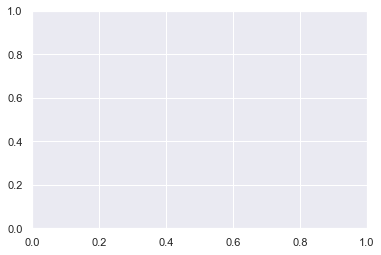

In [13]:
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

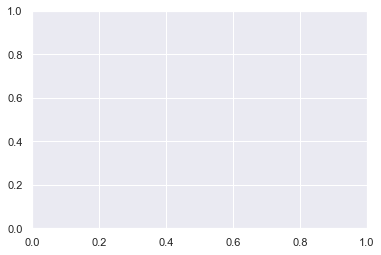

In [14]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20
from sklearn import svm
fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(X, Y)

## Support Vector Machine (SVM)

In [15]:
#HYPERPLANE GRAPH PLOTTING
# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
ax.axis([x_min, x_max,y_min, y_max])
plt.show()

In [16]:
#accuracy of both
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for svm = 0.8925619834710744
Accuracy for test set for svm = 0.8688524590163934


## Logistic Regression

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

In [22]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [23]:
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for Logistic Regression = 0.8512396694214877
Accuracy for test set for Logistic Regression = 0.8524590163934426


In [24]:
print(cm_train)

[[ 86  11]
 [ 25 120]]


## Decision Tree Classifier

In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

In [30]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [31]:
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7868852459016393


In [32]:
print(cm_train)

[[111   0]
 [  0 131]]


## Random Forest Classifier

In [33]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [36]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

In [38]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [39]:
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training set for Random Forest = 0.9958677685950413
Accuracy for test set for Random Forest = 0.819672131147541


In [40]:
print (" Confusion Matrix for Random Forest: ")
print(cm_train)

 Confusion Matrix for Random Forest: 
[[110   0]
 [  1 131]]
